# **In Class Programming Exercise: Probability with NumPy**

## **Dataset: automobile.csv**

Please pair up with the person next to you.

### **Exercise 1: Loading Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### **Exercise 2: Probability of Fuel Type**

* Fuel type can significantly influence various aspects of an automobile, from its price to its performance. In this exercise, we will calculate the probability of an automobile using 'diesel' or 'gas' as its fuel type. This will give us an idea about the distribution of fuel types in our dataset.

In [2]:
prob_diesel = len(df[df['fuel-type'] == 'diesel']) / len(df)
prob_gas = len(df[df['fuel-type'] == 'gas']) / len(df)

print(f'The probability of an automobile using diesel is:  {prob_diesel}')
print(f'The probability of an automobile using gas is:  {prob_gas}')

The probability of an automobile using diesel is:  0.0975609756097561
The probability of an automobile using gas is:  0.9024390243902439


### **Exercise 3: Probability based on Body Style**


* Here, we'll compute the probability that an automobile is a 'sedan' given that it uses 'gas' as its fuel type.

In [5]:
gas_autos = df[df['fuel-type'] == 'gas']
num_sedans_gas = len(gas_autos[gas_autos['body-style'] == 'sedan'])
# num_sedans_gas = np.sum(gas_autos['body-style'] == 'sedan')

prob_sedan_given_gas = num_sedans_gas / len(gas_autos)
print(f"Probability that an automobile is a 'sedan' given that it uses 'gas': {prob_sedan_given_gas:.2f}")

Probability that an automobile is a 'sedan' given that it uses 'gas': 0.44


### **Exercise 4: Conditional Probability**

* Remember that conditional probability is the probability of an event occurring given that another event has already occurred. The notation *P( A | B)* can be understood as the probability (P) of event A given (|) that event B has already occurred.

* The 'make' or brand of an automobile can provide insights into various other attributes like price, performance, and more. In this exercise, we'll compute and visualize the probability distribution for the 'make' attribute. This will show us the distribution of different brands in our dataset.

In [14]:
make_counts = df['make'].value_counts()

total_cars = len(df)
make_probabilities = make_counts / total_cars

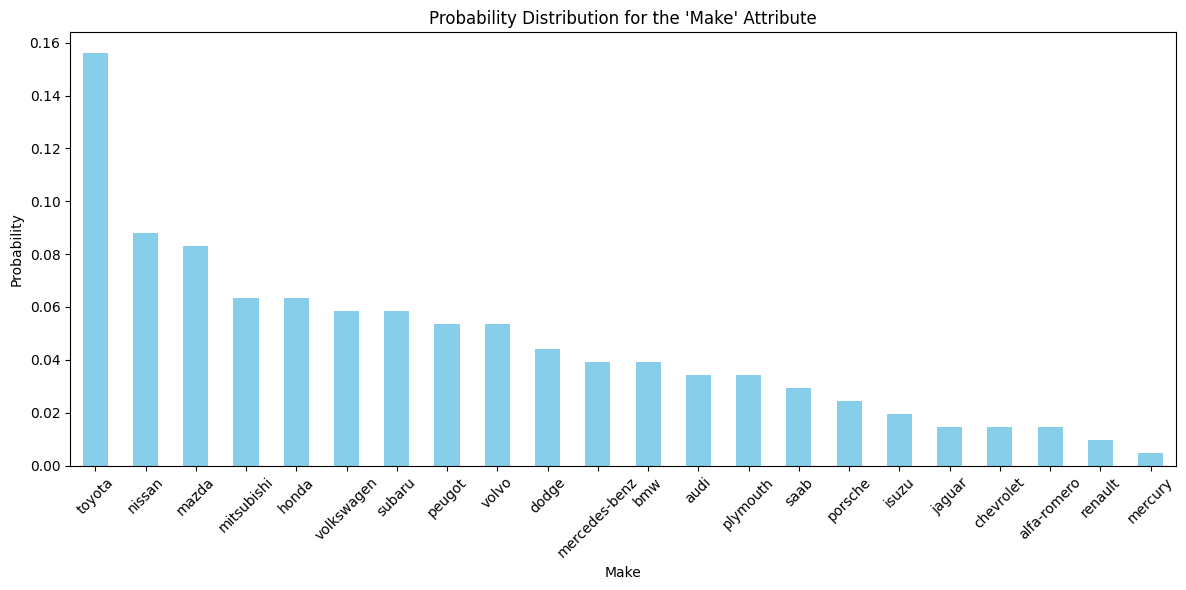

In [15]:
plt.figure(figsize=(12, 6))
make_probabilities.plot(kind='bar', color='skyblue')
plt.title("Probability Distribution for the 'Make' Attribute")
plt.xlabel('Make')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Exercise 5: Probability Distribution of Make**


In this exercise, we'll compute both for the 'price' column to get an understanding of the average price and its variation in our dataset.

In [8]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f"Average Price: ${price_mean:.2f}")
print(f"Standard Deviation of Price: ${price_std:.2f}")

Average Price: $13207.13
Standard Deviation of Price: $7947.07


### **Exercise 6: Expected Value and Variance**

* **Expected value** gives us a central tendency of a set of numbers. It is a weighted average where each outcome is weighted by its probability (for discrete variables) or its probability density (for continuous variables)

* **Variance** provides a measure of the spread. In other words, variance quantifies the degree to which data points in a set deviate from the mean (average) of that set. Variance allows us understand data distribution. A higher variance indicates a wider spread, and a lower variance indicates a narrower spread. Low variance often indicates that future data points will likely be close to the mean, making predictions more reliable. High variance indicates higher unpredictability.

In [9]:
expected_value = df['price'].mean()
variance = df['price'].var()

expected_value, variance

(13207.129353233831, 63155863.44318408)

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

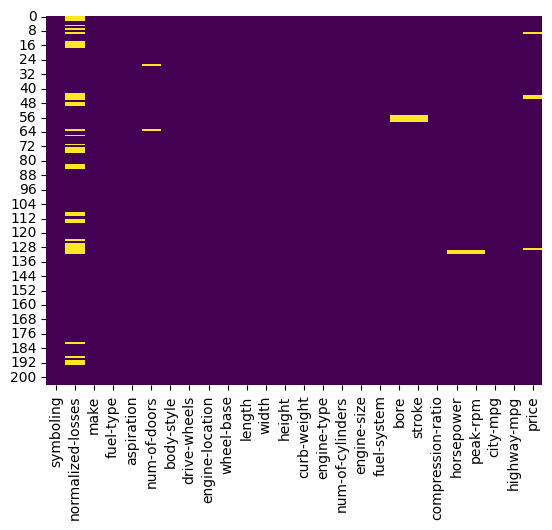

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()